In [1]:
import sys
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../../src')
from paths import FXD_DB_DIR, OFFSTD_DB_DIR
from utils.functions import clean_folder, load_datasets_from_csv
from utils.formatter import remove_offset
from plot import show_serie, show_hist

%load_ext autoreload
%autoreload 2

In [2]:
clean_folder(OFFSTD_DB_DIR, "*.csv")

In [3]:
datasets = load_datasets_from_csv(FXD_DB_DIR).copy()

In [4]:
air_old = datasets['air']['Pwr'].copy()
air = datasets['air']

In [5]:
air_pwr = air['Pwr']

In [6]:
tr = (air_pwr > 20) & (air_pwr <=90)
tr_air = air_pwr > 90
u_tr = air_pwr[tr].mean()

### Where only TR signal is present, set to 0 by subtract itself

In [7]:
air_pwr[tr] -= air_pwr[tr]

### Where TR signal is mixed with Air signal, remove the mean value of TR signal

In [8]:
air_pwr[tr_air] -= u_tr

## Comparation

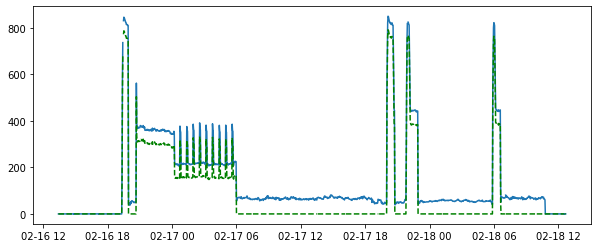

In [9]:
fig, ax = plt.subplots(figsize=(10,4), sharex=True)
ax.plot(air_old[:1440])
ax.plot(air_pwr[:1440], c='g', ls = '--')

In [10]:
tr_signal = (air_old - air_pwr)

In [11]:
datasets['air']['TR'] = tr_signal

## Fridge

In [12]:
fridge_old = datasets['fridge'].copy()
fridge = datasets['fridge']

In [13]:
fg_pwr = fridge['Pwr']

In [14]:
lp =  (fg_pwr > 5) & (fg_pwr < 30)

In [15]:
u_lp = fg_pwr[lp].mean()

In [16]:
fg_pwr[lp] -= fg_pwr[lp]

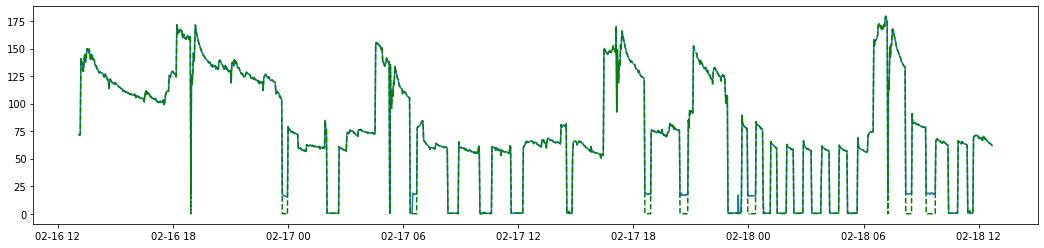

In [17]:
fig, ax = plt.subplots(figsize=(18,4), sharex=True)
plt.plot(fridge_old['Pwr'][:1440])
plt.plot(fg_pwr[:1440], c='g', ls = '--')

## Fan

In [18]:
fan_old = datasets['fan'].copy()
fan = datasets['fan']

In [19]:
fan_pwr = fan['Pwr']

In [20]:
lp_f = (fan_pwr > 3) & (fan_pwr < 20)

In [21]:
u_lpf = fan_pwr[lp_f].mean()

In [22]:
fan_pwr[lp_f] -= fan_pwr[lp_f]

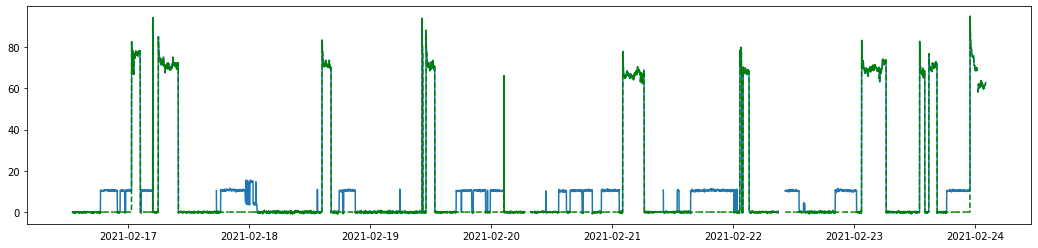

In [23]:
fig, ax = plt.subplots(figsize=(18,4), sharex=True)
plt.plot(fan_old['Pwr'][:5440])
plt.plot(fan_pwr[:5440], c='g', ls = '--')

In [24]:
pc_old = datasets['computer'].copy()
pc = datasets['computer']

In [25]:
pc_pwr = pc['Pwr']

In [26]:
rasp = (pc_pwr > 2) & (pc_pwr < 15)

In [27]:
u_rasp = pc_pwr[rasp].mean()

In [28]:
pc_pwr[rasp] -= pc_pwr[rasp]

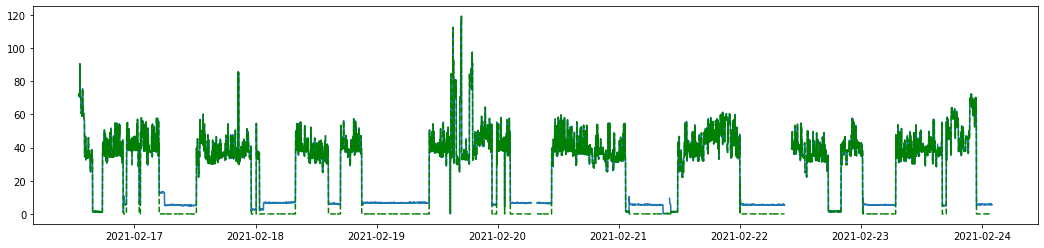

In [29]:
fig, ax = plt.subplots(figsize=(18,4), sharex=True)
plt.plot(pc_old['Pwr'][:5440])
plt.plot(pc_pwr[:5440], c='g', ls = '--')

In [30]:
for key in datasets:
    print(key)
    datasets[key].name = str(key)
    datasets[key].to_csv(OFFSTD_DB_DIR+"/{}.csv".format(key), float_format='%.4f')

external
fan
air
pump
fridge
computer
house
